In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedGroupKFold, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd  
import numpy as np

In [28]:
# importando o banco de dados do sklearn , e transformando em um dataframe
pd.set_option("display.max_columns", 30)
dados = load_breast_cancer()
x = pd.DataFrame(dados.data, columns=[dados.feature_names])
y = pd.Series(dados.target)

In [29]:
y.value_counts()

1    357
0    212
Name: count, dtype: int64

In [30]:
x_treino , x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.30)
modelo = LogisticRegression(C= 95, penalty =None)
modelo.fit(x_treino, y_treino)
resultado = modelo.score(x_teste, y_teste)

/home/marco/projects/machine_learning/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/marco/projects/machine_learning/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
print(f"A acuracia é dada por {resultado}")

A acuracia é dada por 0.9415204678362573


In [32]:
predicao = modelo.predict(x_teste)

In [33]:
predicao

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1])

In [34]:
matriz = confusion_matrix(y_teste, predicao)
print(matriz)

[[ 60   4]
 [  6 101]]


In [35]:
predicoes = modelo.predict_proba(x_teste)
predicoes

array([[9.99881118e-01, 1.18881818e-04],
       [4.31807753e-02, 9.56819225e-01],
       [1.83167253e-02, 9.81683275e-01],
       [9.59432460e-01, 4.05675401e-02],
       [9.99999999e-01, 7.57530037e-10],
       [1.00000000e+00, 1.42405290e-27],
       [9.99999993e-01, 7.22753585e-09],
       [7.28253390e-04, 9.99271747e-01],
       [8.04682428e-02, 9.19531757e-01],
       [1.57433808e-03, 9.98425662e-01],
       [2.38565429e-01, 7.61434571e-01],
       [4.41278200e-03, 9.95587218e-01],
       [1.19661340e-03, 9.98803387e-01],
       [9.99616772e-01, 3.83228358e-04],
       [9.51251143e-01, 4.87488571e-02],
       [1.16791875e-04, 9.99883208e-01],
       [9.09494091e-03, 9.90905059e-01],
       [6.41470492e-04, 9.99358530e-01],
       [5.76344321e-03, 9.94236557e-01],
       [7.70942401e-03, 9.92290576e-01],
       [1.00000000e+00, 4.25850970e-40],
       [8.43642850e-04, 9.99156357e-01],
       [1.01813276e-04, 9.99898187e-01],
       [4.84284570e-05, 9.99951572e-01],
       [1.398634

In [36]:
probs = predicoes[:, 1]
fpr, tpr, thresholds = roc_curve(y_teste, probs)
print(f'TPR :{tpr}')
print(f'FPR :{fpr}')
print(f'thresholds :{thresholds}')

TPR :[0.         0.00934579 0.76635514 0.76635514 0.81308411 0.81308411
 0.91588785 0.91588785 0.95327103 0.95327103 0.96261682 0.96261682
 0.98130841 0.98130841 1.         1.        ]
FPR :[0.       0.       0.       0.015625 0.015625 0.046875 0.046875 0.0625
 0.0625   0.078125 0.078125 0.1875   0.1875   0.203125 0.203125 1.      ]
thresholds :[           inf 9.99982934e-01 9.79821837e-01 9.79473069e-01
 9.50160765e-01 9.43970766e-01 7.61434571e-01 7.47765189e-01
 4.43754945e-01 3.18101230e-01 2.63893589e-01 4.05675401e-02
 3.79128763e-02 2.87134879e-02 1.75266449e-02 4.25850970e-40]


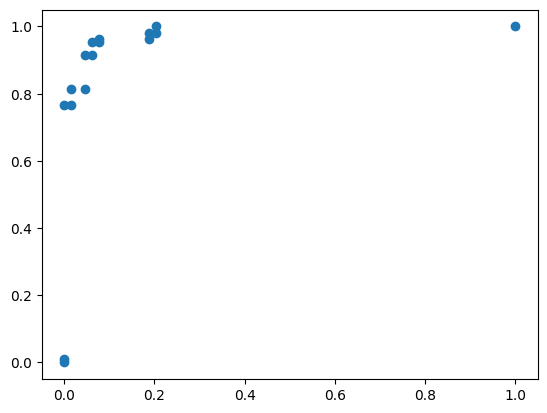

In [37]:
plt.scatter(fpr, tpr)
plt.show()

In [38]:
print(roc_auc_score(y_teste, probs))


0.9840829439252337
